In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import glob 
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df_bitcoin=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Bitcoin.csv") 
df_cardano = pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Cardano.csv")

In [5]:
df_cardano.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [6]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_cardano['Date'] = pd.to_datetime(df_cardano['Date'])

df_merged = pd.merge(df_bitcoin, df_cardano, on='Date', suffixes=('_btc', '_ADA'))
btc_precio = df_merged['High_btc']
ada_precio = df_merged['High_ADA']

corr, _ = pearsonr(btc_precio, ada_precio)
print(f"Coeficiente  entre BTC y ADA: {corr}")

Coeficiente  entre BTC y ADA: 0.854390914506703


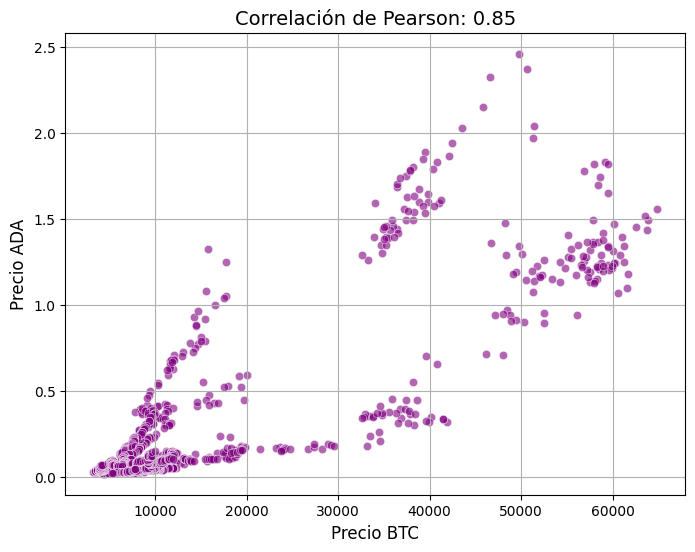

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=btc_precio, y=ada_precio, color='purple', alpha=0.6)
plt.title(f'Correlación de Pearson: {corr:.2f}', fontsize=14)
plt.xlabel('Precio BTC', fontsize=12)
plt.ylabel('Precio ADA', fontsize=12)
plt.grid(True)
plt.show()

In [8]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_cardano['Date'] = pd.to_datetime(df_cardano['Date'])

start_date = '2017-10-03 23:59:59'
df_btc_filtered = df_bitcoin[df_bitcoin['Date'] >= start_date]
df_ada_filtered = df_cardano[df_cardano['Date'] >= start_date]

df_merged = pd.merge(df_bitcoin, df_cardano, on='Date', suffixes=('_btc', '_ada'))
df_merged['btc_change'] = df_merged['Close_btc'].diff()
df_merged['ada_change'] = df_merged['Close_ada'].diff()

btc_up_dates = df_merged[df_merged['btc_change'] > 0]['Date']
ada_up_dates = df_merged[df_merged['ada_change'] > 0]['Date']

time_diffs = []
for btc_date in btc_up_dates:
    nearest_ada_date = ada_up_dates.iloc[(ada_up_dates - btc_date).abs().argmin()]
    time_diff = abs((nearest_ada_date - btc_date).days)
    time_diffs.append({'BTC Date': btc_date, 'ADA Date': nearest_ada_date, 'Tiempo de diferencia (dias)': time_diff})

time_diffs_df = pd.DataFrame(time_diffs)
print(time_diffs_df)

               BTC Date            ADA Date  Tiempo de diferencia (dias)
0   2017-10-05 23:59:59 2017-10-04 23:59:59                            1
1   2017-10-06 23:59:59 2017-10-07 23:59:59                            1
2   2017-10-07 23:59:59 2017-10-07 23:59:59                            0
3   2017-10-08 23:59:59 2017-10-07 23:59:59                            1
4   2017-10-09 23:59:59 2017-10-09 23:59:59                            0
..                  ...                 ...                          ...
730 2021-06-29 23:59:59 2021-06-29 23:59:59                            0
731 2021-07-02 23:59:59 2021-07-02 23:59:59                            0
732 2021-07-03 23:59:59 2021-07-03 23:59:59                            0
733 2021-07-04 23:59:59 2021-07-04 23:59:59                            0
734 2021-07-06 23:59:59 2021-07-06 23:59:59                            0

[735 rows x 3 columns]
